# Numpy/Matplotlib/Sklearn Crash Course for "Machine Learning and Pattern Recognition"

<center>
    <b>
        KV 344.009, 2020<br/>
        Jan Schlüter
    </b><br/>
    Some parts borrowed from Hamid Eghbal-Zadeh, Khaled Koutini, Filip Korzeniowski, Matthias Dorfer, Rainer Kelz, Andreas Arzt<br/><br/>
    <img src="http://imgs.xkcd.com/comics/python.png" />
</center>

# The Scientific Ecosystem

There are three open-source modules not built into Python that are often referred to as the "scientific software stack":

1. [numpy](http://www.numpy.org/), for all things vectors and matrices
2. [scipy](http://www.scimpy.org/), for more advanced statistics and optimization
3. [matplotlib](http://www.matplotlib.org/), for data visualization and plots

## numpy

Numpy provides a class for representing **vectors**, **matrices** and higher-order **tensors**, and functions for performing **linear algebra** operations.

### Why linear algebra?

Many algorithms and models can be represented using matrix operations:

* Probabilistic Models (factor analysis, bayesian networks, ...)
* Neural Networks
* Signal / Image Processing
* ...

Matrix operations are easily vectorisable and thus scale well. Representing problems using matrices might be unintuitive at the beginning, but once you get the hang of it, you can apply your skills to various problems.

### Baby steps

The convention is to import numpy under the shorthand name `np`:

In [1]:
import numpy as np

All tensors use the `ndarray` class:

In [2]:
x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [3]:
x + 2

array([3, 4, 5])

### Why numpy?

We *could* just use Python lists of (lists of ...) numbers to represent tensors. But this would be slow:

* every single number would be an object, taking more space than needed
* arithmetic operations on these objects incur quite some overhead
* iteration in Python also incurs quite some overhead

Numpy stores tensors like arrays in C, and uses highly-optimized BLAS libraries for tensor operations. Anything performance-critical (especially loops!) is implemented in C rather than Python. So it is fast as C, with the convenience of Python.

Let's compare performance:

In [4]:
x = range(10000)
%timeit [v + 2 for v in x]

451 µs ± 5.52 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
x = np.arange(10000)
%timeit x + 2

2.99 µs ± 28.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Of course this requires us to express our algorithms without resorting to `for` loops. Looping over a numpy array is as bad as a list:

In [6]:
x = np.arange(10000)
%timeit np.array([v + 2 for v in x])  # bad idea

2.94 ms ± 30.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Vectors, matrices, and other tensors

Let's start with a simple vector again:

In [7]:
x = np.array([1, 2, 3])

Every numpy array has a dimensionality, shape and data type:

In [8]:
x.ndim

1

In [9]:
x.shape

(3,)

In [10]:
x.dtype

dtype('int64')

Indexing works as for lists and strings:

In [11]:
x

array([1, 2, 3])

In [12]:
x[0]

1

In [13]:
x[::-1]

array([3, 2, 1])

A matrix can be constructed from a list of rows:

In [14]:
x = np.array([[1, 2, 1], [2, 3, 2]])
x

array([[1, 2, 1],
       [2, 3, 2]])

In [15]:
print(x.ndim, x.shape, x.dtype)

2 (2, 3) int64


Indexing can now take a specification for each dimension:

In [16]:
x[0, 0]

1

First row:

In [17]:
x[0]

array([1, 2, 1])

First column (`:` is shorthand for "everything"):

In [18]:
x[:, 0]

array([1, 2])

Transposing a matrix:

In [19]:
x.T

array([[1, 2],
       [2, 3],
       [1, 2]])

We can also create tensors just by giving their shape:

In [20]:
np.zeros((1, 2))

array([[0., 0.]])

In [21]:
np.ones((2, 2, 2))

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]])

In [22]:
np.random.rand(3, 2)

array([[0.71295864, 0.98007146],
       [0.69404796, 0.73705225],
       [0.52983268, 0.99744233]])

Transposing a higher-order tensor:

In [23]:
x = np.zeros((3, 4, 5))
x = x.transpose(0, 2, 1)  # new order of the three dimensions
x.shape

(3, 5, 4)

### Data types

You may have noted that sometimes, numbers end with a dot (`.`) -- this denotes floating point numbers.

In [24]:
np.array([1, 1])

array([1, 1])

In [25]:
np.array([1, 1], dtype=np.float32)

array([1., 1.], dtype=float32)

The data type can be specified in any array-constructing function. Important data types include:

* floating point: np.float32, np.float64
* integers: np.int, np.uint8
* boolean: np.bool

Conversions are done using `.astype` (which creates a copy even if the type stays the same) or `asarray` (which only copies if needed):

In [26]:
x = np.zeros(3, dtype=np.bool)
x

array([False, False, False])

In [27]:
x.astype(np.double)

array([0., 0., 0.])

In [28]:
np.asarray(x, dtype=np.int)

array([0, 0, 0])

### Shapes

Shapes can be changed if the total number of elements stays the same.

In [29]:
x = np.arange(6).reshape(2, 3)
x

array([[0, 1, 2],
       [3, 4, 5]])

In [30]:
x.ravel()

array([0, 1, 2, 3, 4, 5])

In [31]:
x.reshape(3, 2)

array([[0, 1],
       [2, 3],
       [4, 5]])

In [32]:
x.reshape(-1, 2, 1)  # -1 is inferred to match

array([[[0],
        [1]],

       [[2],
        [3]],

       [[4],
        [5]]])

### Views

Slicing, reshaping and transposition create *views* into the same underlying memory, not copies of the data. Changing data through a view affects the original array:

In [33]:
x = np.zeros(5)
y = x[::2]  # a view of every second element
print(y)

[0. 0. 0.]


In [34]:
y += 3
print(x)

[3. 0. 3. 0. 3.]


(If it helps: A numpy array stores a pointer to the first item in a block of memory, the size of each dimension, and the *stride* of each dimension telling how far apart entries in that dimension are stored in memory. You can access them as `x.data`, `x.shape`, and `x.stride`. Reshaping, taking subtensors, transposing and reversing can all be expressed by changing the pointer, size or stride, without copying any memory. In general, if no memory copy is needed, numpy will avoid it.)

### Fancy indexing

We can also select elements from an array using a boolean mask, or an array of indices. This is called *fancy indexing*. It creates a copy, not a view:

In [35]:
x = np.arange(10)
y = x[x > 5]
print(y)

[6 7 8 9]


In [36]:
y *= 0
print(x)

[0 1 2 3 4 5 6 7 8 9]


However, using slice assignment, we can modify elements selected with fancy indexing:

In [37]:
print(x)
x[x > 5] = 1
print(x)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 1 1 1 1]


(If it helps: This statement calls [`x.__setitem__`](https://docs.python.org/3/reference/datamodel.html#object.__setitem__), it does not construct `x[x > 5]` and then assign to it.)

### Pointwise operations and broadcasting

Most operations on arrays are applied elementwise:

In [38]:
x = np.arange(6).reshape(2, 3)

In [39]:
x * 5

array([[ 0,  5, 10],
       [15, 20, 25]])

They work as long as the two operands have compatible shapes. That is, either the same shape:

In [40]:
x + np.ones((2, 3))

array([[1., 2., 3.],
       [4., 5., 6.]])

Or the same shape, but with some dimensions of size 1:

In [41]:
x + np.arange(3).reshape(1, 3)

array([[0, 2, 4],
       [3, 5, 7]])

In [42]:
x + np.arange(2).reshape(2, 1)

array([[0, 1, 2],
       [4, 5, 6]])

Dimensions of size 1 ("singleton dimensions") are implicitly replicated as needed. This is called **broadcasting**. If the dimensionality of the operands is not the same, then dimensions of size 1 are appended on the left.

In [43]:
x

array([[0, 1, 2],
       [3, 4, 5]])

In [44]:
y = np.array([10, 20, 30])

In [45]:
x + y  # broadcasting: add y to every row

array([[10, 21, 32],
       [13, 24, 35]])

(If it helps anybody, this is the same as using `bsxfun` in Matlab/Octave.)

Since missing dimensions are always added on the left, a one-dimensional array is always interpreted as a row vector. To get a column vector, we need to make it two-dimensional.

In [46]:
y = np.array([10, 20])
y[:, np.newaxis]  # view of y with new dimension in the end

array([[10],
       [20]])

In [47]:
x + y[:, np.newaxis]  # add column vector to every column

array([[10, 11, 12],
       [23, 24, 25]])

We can also add a row vector and a column vector to get a matrix:

In [48]:
x = np.arange(3)
y = np.arange(2)
x + y[:, np.newaxis]

array([[0, 1, 2],
       [1, 2, 3]])

### Matrix multiplication

We saw that `*` just does an elementwise multiplication. For a dot product, we use `np.dot` or the `@` operator:

In [49]:
x = np.ones((2, 3))
y = np.ones((4, 3))
x @ y.T

array([[3., 3., 3., 3.],
       [3., 3., 3., 3.]])

### Reduction

Often we need to compute multiple sums or other statistics. This is called a *reduction* operation, and can be applied to a subset of dimensions:

In [50]:
x = np.random.randn(10, 20, 30)
y = x.mean(axis=0)
y.shape

(20, 30)

Negative axes are counted from the end, as in array indexing:

In [51]:
y = x.mean(axis=-1)
y.shape

(10, 20)

We can keep the dimension we reduce over as a singleton dimension:

In [52]:
y = x.mean(axis=1, keepdims=True)
y.shape

(10, 1, 30)

This is especially useful when combined with broadcasting.

In [53]:
x -= x.mean(axis=(1, 2), keepdims=True)  # subtract mean over last two dims

Other reduction operations include `std`, `var`, `sum`, `median`, `min`, `max`. Most can be accessed both as methods of an array (`x.min()`) and as a module function (`np.min(x)`), some only as the latter.

### Vectorized programming

To fully benefit from the speed of numpy, we must express everything as *vectorized* operations. For example, let's take the following matrix:

In [54]:
x = np.arange(15).reshape(3, 5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

And assume that from each row, we want to subtract the smallest element. It is tempting to write this as:

In [55]:
for row in x:
    m = row.min()
    row -= m
print(x)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


But this can be done entirely without a Python loop. We can compute the minima of all rows in one go:

In [56]:
x = np.arange(15).reshape(3, 5)
m = x.min(axis=1, keepdims=True)
print(m)

[[ 0]
 [ 5]
 [10]]


And then subtract them from the corresponding rows, thanks to broadcasting:

In [57]:
x -= m
print(x)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


It takes a while to get the hang of *array-oriented programming*, but then it is very powerful.

### Saving and Loading

The native format for saving a numpy array is a `.npy` file:

In [58]:
x = np.arange(15).reshape(3, 5)
np.save('smallmatrix.npy', x)

It can be loaded again with:

In [59]:
x = np.load('smallmatrix.npy')
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

For `.npy` files too large to fit into your RAM, you can map them directly from disk to memory:

In [60]:
x = np.load('smallmatrix.npy', mmap_mode='r')  # 'r' for readonly
x

memmap([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

Multiple arrays can be combined into a `.npz` file, which is a disguised ZIP archive of `.npy` files:

In [61]:
np.savez('matrices.npz', x=np.arange(5), y=np.arange(10))

They are also loaded with `np.load`, giving access to all arrays stored within:

In [62]:
data = np.load('matrices.npz')
print(data.files)

['x', 'y']


In [63]:
data['x']

array([0, 1, 2, 3, 4])

In [64]:
data['y']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You can also read text files with `np.loadtxt()` and write them with `x.tofile()`, and Matlab files with the `scipy.io.matlab` module.

## Matplotlib

The most widespread module for plotting data and creating figures for papers in Python is `matplotlib`. It nicely integrates with notebooks when entering the `%matplotlib inline` magic function. Let's do so and import it:

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

`pyplot` is an easy interface for `matplotlib`, and imported as `plt` by convention. It relies on `numpy` for the data representation.

### Line graphs and legends:

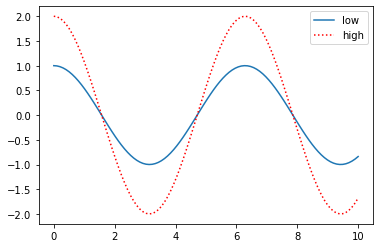

In [66]:
x = np.linspace(0, 10, 100)
y = np.cos(x)
plt.plot(x, y, label='low')
plt.plot(x, 2 * y, color='r', linestyle=':', label='high')
plt.legend(loc='upper right')

### Bar charts:

Text(0.5, 0.98, 'remaining stock')

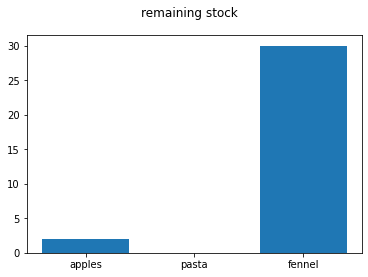

In [67]:
data = {'apples': 2, 'pasta': 0, 'fennel': 30}
xpos = [0, 1, 2]
plt.bar(x=xpos, height=data.values())
plt.xticks(xpos, data.keys())
plt.suptitle('remaining stock')

### Matrices and color bars:

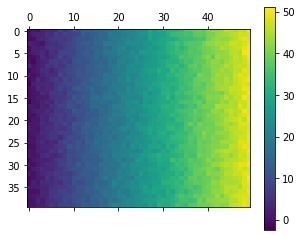

In [68]:
x = np.random.randn(40, 50)
x += np.arange(50)
plt.matshow(x)
plt.colorbar()

The matplotlib tutorial includes a [guide on choosing color maps](https://matplotlib.org/tutorials/colors/colormaps.html) for a particular purpose.

### Multiple plots:

Text(0.5, 1.0, 'apple dataset')

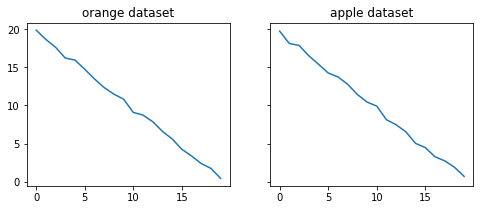

In [69]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(8, 3))
axs[0].plot(20 - np.random.rand(20) - np.arange(20))
axs[1].plot(20 - np.random.rand(20) - np.arange(20))
axs[0].set_title('orange dataset')
axs[1].set_title('apple dataset')

### Saving figures

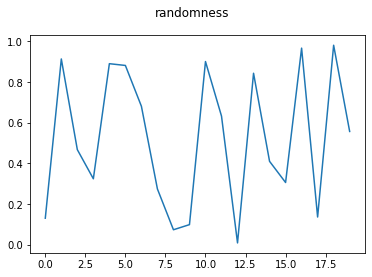

In [70]:
plt.plot(np.random.rand(20))
plt.suptitle('randomness')
plt.savefig('myplot.pdf', transparent=True, bbox_inches='tight')

### Outside notebooks

If you start the interactive console with `ipython --matplotlib`, you will get *interactive plotting*: The first plotting command opens a figure in a separate window, and all other plotting commands update it.

In a Python script, call `plt.show()` whenever you want to display the figure(s) you created. Or just call `plt.savefig()` and do not show anything on screen.

### More plots

These were just the basics -- see the [matplotlib gallery](https://matplotlib.org/gallery/index.html) or the [matplotlib reference](https://matplotlib.org/api/pyplot_summary.html) for more plotting goodness.

If you want to dig deeper, also look at [pandas](https://pandas.pydata.org/docs/user_guide/visualization.html#plotting-tools) for data analysis and visualization.

## scikit-learn

scikit-learn is a Python package of machine learning algorithms.

From [their web page](https://scikit-learn.org/stable/):
* Simple and efficient tools for predictive data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable - BSD license

### Installation

Installation with pip:
```
sudo pip3 install scikit-learn
```

Installation with conda:
```
conda install scikit-learn
```

Check if it can be imported:

In [71]:
import sklearn

### Basic concepts

Datasets are represented as numpy arrays of input features, such as:

In [72]:
rng = np.random.RandomState(23)  # reproducible random generator
x = rng.randn(100, 2)  # 100 data points of 2 features
x.shape

(100, 2)

And, in a supervised setting, corresponding target classes or values:

In [73]:
y = (np.linalg.norm(x, axis=-1) > 1).astype(np.int)
y.shape

(100,)

scikit-learn provides classes for:

* preprocessing, feature extraction/selection
* classification
* regression
* density estimation
* clustering

Generally, these classes provide a `fit()` method for training, and `transform()` for application to new data.

In addition, scikit-learn provides utilities for:

* creating stratified train/test splits
* evaluation
* cross-validation
* grid search
* ...

### Classification example

Above, we created a toy dataset of 2D points. Visualized:

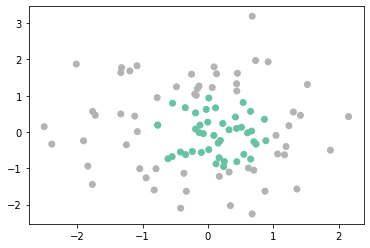

In [74]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Set2')

We'll do a train/test split:

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

To obtain a validation set, you'd further split the training data.

Let's fit a classifier to it. Scikit-learn [includes many of those](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). We'll try Gaussian Naive Bayes:

In [76]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

Hyperparameters would be passed to the constructor.

We can now train the classifier:

In [77]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

And apply it to our test set:

In [78]:
y_pred = gnb.predict(x_test)

Let's plot the result (along with the known ground truth decision boundary):

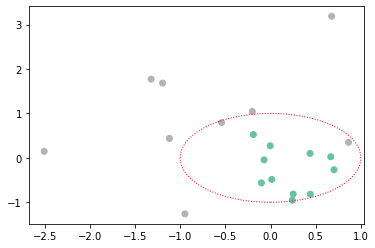

In [79]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, cmap='Set2')
plt.gca().add_artist(plt.Circle((0, 0), 1.0, fill=False, ec='r', ls=':'))

scikit-learn also includes evaluation metrics for classification:

In [80]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9

In [81]:
metrics.confusion_matrix(y_test, y_pred)

array([[11,  2],
       [ 0,  7]])

In [82]:
print(metrics.classification_report(y_test, y_pred,
                                    target_names=['inside', 'outside']))

              precision    recall  f1-score   support

      inside       1.00      0.85      0.92        13
     outside       0.78      1.00      0.88         7

    accuracy                           0.90        20
   macro avg       0.89      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



### Cross-validation example

Instead of a single train/test or train/validation split, we can do cross-validation:

In [83]:
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()
scores = cross_val_score(gnb, x_train, y_train, cv=5)  # 5 folds
print(scores)
print('%.3f ± %.3f' % (scores.mean(), scores.std()))

[0.6875 0.9375 0.875  0.9375 0.9375]
0.875 ± 0.097


This will use the default scoring function of the model (here, accuracy). See [the documentation](https://scikit-learn.org/stable/modules/cross_validation.html) for more examples.

### Preprocessing example



In [84]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [85]:
x_train_normalized = scl.transform(x_train)
x_test_normalized = scl.transform(x_test)

We can plot this again:

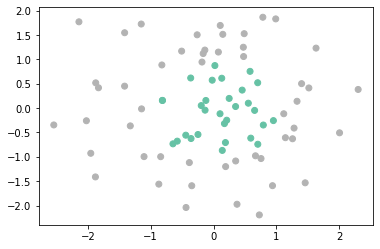

In [86]:
plt.scatter(x_train_normalized[:, 0], x_train_normalized[: ,1],
            c=y_train, cmap='Set2')

Again, see [the documentation](https://scikit-learn.org/stable/modules/preprocessing.html) for more examples.

### Preprocessing within Cross-Validation

When using preprocessing with cross-validation, you will need to preprocess each fold separately. To do so, combine it with the model into a [*pipeline*](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html):

In [87]:
from sklearn.pipeline import Pipeline
scl = StandardScaler()
gnb = GaussianNB()
pipeline = Pipeline([('transformer', scl), ('estimator', gnb)])

Then use this as if it was a plain model:

In [88]:
scores = cross_val_score(pipeline, x_train, y_train, cv=5)  # 5 folds
print(scores)
print('%.3f ± %.3f' % (scores.mean(), scores.std()))

[0.6875 0.9375 0.875  0.9375 0.9375]
0.875 ± 0.097


Scores are exactly the same because...

...this particular model will model the mean and standard deviation of the data anyway.

### More machine learning

For more examples and documentation, see:
* The scikit-learn [front page](https://scikit-learn.org/) and [gallery](https://scikit-learn.org/stable/auto_examples/index.html)
* The scikit-learn tutorial in the [scipy lecture notes](https://scipy-lectures.org/packages/scikit-learn/index.html)